In [1]:
pip freeze > visualisation_requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [4]:
data_df = pd.read_csv("Project_data_csv")

In [5]:
data_df.shape

(270223, 31)

In [6]:
data_df.head()

,Unnamed: 0,batting_team,bowling_team,innings_num,over_col,ball_col,Match ID,Start Date,Runs,Running Total,...,Over and Balls Total,Remaining Team Value,Remaining Average Team Value,Start Team Value,DLS %,Tie Score,Ground RPO,Ground RPW,Batting Team Result DLS,DLS Correct?
0,0,Pakistan,Australia,2,20,1,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.6,103,4.79,29.31,Australia,Yes
1,1,Pakistan,Australia,2,20,2,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.8,103,4.79,29.31,Australia,Yes
2,2,Pakistan,Australia,2,20,3,1000887,2017-01-13,0,91,...,55,16,2.0,24,38.9,104,4.79,29.31,Australia,Yes
3,3,Pakistan,Australia,2,20,4,1000887,2017-01-13,0,91,...,55,16,2.0,24,39.1,104,4.79,29.31,Australia,Yes
4,4,Pakistan,Australia,2,20,5,1000887,2017-01-13,1,92,...,55,16,2.0,24,39.3,105,4.79,29.31,Australia,Yes


In [7]:
data_df['DLS Correct?'].value_counts()

DLS Correct?
Yes    225310
No      44913
Name: count, dtype: int64

In [8]:
DLS_accuracy=225310/(225310+44913)

In [9]:
DLS_accuracy

0.833792830366031

In [10]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    270223 non-null  int64  
 1   batting_team                  270223 non-null  object 
 2   bowling_team                  270223 non-null  object 
 3   innings_num                   270223 non-null  int64  
 4   over_col                      270223 non-null  int64  
 5   ball_col                      270223 non-null  int64  
 6   Match ID                      270223 non-null  int64  
 7   Start Date                    270223 non-null  object 
 8   Runs                          270223 non-null  int64  
 9   Running Total                 270223 non-null  int64  
 10  Batter out                    270223 non-null  object 
 11  Wickets taken                 270223 non-null  int64  
 12  Start Team                    270223 non-nul

In [11]:
remaining_onb = []
for index, row in data_df.iterrows():
    onb = (row['Remaining Overs']*6) + row['Remaining Balls']
    remaining_onb.append(onb)
remaining_onb_df = pd.DataFrame(remaining_onb)

In [ ]:
remaining_onb_df

,0
0,179
1,178
2,177
3,176
4,175
...,...
270218,18
270219,17
270220,16
270221,15


Below - creating a column for who wins - team 1 (team who bowled second), team 2(team who batted second) or a tie.  Can define these as bowling team and batting team respectively because I'm only using second innings data.

Find justification for using -1,0 and 1 rather than 1,2,3

In [ ]:
winner_no = []
for index, row in data_df.iterrows():
    #Team 2 wins
    if row['Winner'] == row['batting_team']:
        winner_no.append(1)
    #Team 1 wins
    elif row['Winner'] == row['bowling_team']:
        winner_no.append(-1)
    #Tie
    else:
       winner_no.append(0)

In [ ]:
winner_no_df = pd.DataFrame(winner_no)

In [ ]:
winner_no_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   0       270223 non-null  int64
dtypes: int64(1)
memory usage: 2.1 MB


In [ ]:
winner_no_df.rename(columns={0: 'Winner_num'}, inplace=True)

Turning the Team 1 win, Team 2 win and tie numbers into 3 categories (1,2,3 respectively)

In [ ]:
#winner_no_df['Winner_num'] = winner_no_df.Winner_num.astype('category')


In [ ]:
data_df['Winner_num'] = winner_no_df['Winner_num']

In [ ]:
data_df['Remaining overs and balls'] = remaining_onb_df[0]

In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    270223 non-null  int64  
 1   batting_team                  270223 non-null  object 
 2   bowling_team                  270223 non-null  object 
 3   innings_num                   270223 non-null  int64  
 4   over_col                      270223 non-null  int64  
 5   ball_col                      270223 non-null  int64  
 6   Match ID                      270223 non-null  int64  
 7   Start Date                    270223 non-null  object 
 8   Runs                          270223 non-null  int64  
 9   Running Total                 270223 non-null  int64  
 10  Batter out                    270223 non-null  object 
 11  Wickets taken                 270223 non-null  int64  
 12  Start Team                    270223 non-nul

Chose numerical values that feed into my hypothesis (wickets taken, team value, ground scores and remaining overs and balls feed into the prediction.)  Changed Winner into a numerical field for prediction as this will be the target variable.

In [ ]:
data_df = data_df[['Unnamed: 0', 'Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Winner_num', 'Remaining overs and balls', 'Remainder']]

In [ ]:
data_df.rename(columns={'Unnamed: 0': 'Row ID'}, inplace=True)

In [ ]:
data_df

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,0,3,16,2.000,24,4.79,29.31,-1,179,29.5
1,1,3,16,2.000,24,4.79,29.31,-1,178,29.4
2,2,3,16,2.000,24,4.79,29.31,-1,177,29.3
3,3,3,16,2.000,24,4.79,29.31,-1,176,29.2
4,4,3,16,2.000,24,4.79,29.31,-1,175,29.1
...,...,...,...,...,...,...,...,...,...,...
270218,270218,3,13,1.625,21,5.40,31.64,1,18,3.0
270219,270219,3,13,1.625,21,5.40,31.64,1,17,2.5
270220,270220,3,13,1.625,21,5.40,31.64,1,16,2.4
270221,270221,3,13,1.625,21,5.40,31.64,1,15,2.3


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270223 entries, 0 to 270222
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        270223 non-null  int64  
 1   Wickets taken                 270223 non-null  int64  
 2   Remaining Team Value          270223 non-null  int64  
 3   Remaining Average Team Value  270223 non-null  float64
 4   Start Team Value              270223 non-null  int64  
 5   Ground RPO                    270223 non-null  float64
 6   Ground RPW                    270223 non-null  float64
 7   Winner_num                    270223 non-null  int64  
 8   Remaining overs and balls     270223 non-null  int64  
 9   Remainder                     270223 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 20.6 MB


In [ ]:
data_df.describe()

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
count,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000,270223.000000
mean,135111.000000,4.340881,12.531653,1.807368,24.059592,4.944435,30.351967,-0.029231,104.967978,17.326729
std,78006.805233,2.190549,5.533073,0.332030,1.742394,0.353677,3.465019,0.993112,47.241142,7.871791
min,0.000000,0.000000,1.000000,1.000000,16.000000,3.980000,20.560000,-1.000000,0.000000,0.000000
25%,67555.500000,3.000000,8.000000,1.600000,23.000000,4.720000,28.180000,-1.000000,68.000000,11.200000
50%,135111.000000,4.000000,13.000000,1.857143,24.000000,4.850000,29.640000,-1.000000,109.000000,18.100000
75%,202666.500000,6.000000,17.000000,2.000000,25.000000,5.090000,32.440000,1.000000,146.000000,24.200000
max,270222.000000,10.000000,29.000000,3.000000,30.000000,6.910000,53.080000,1.000000,180.000000,30.000000


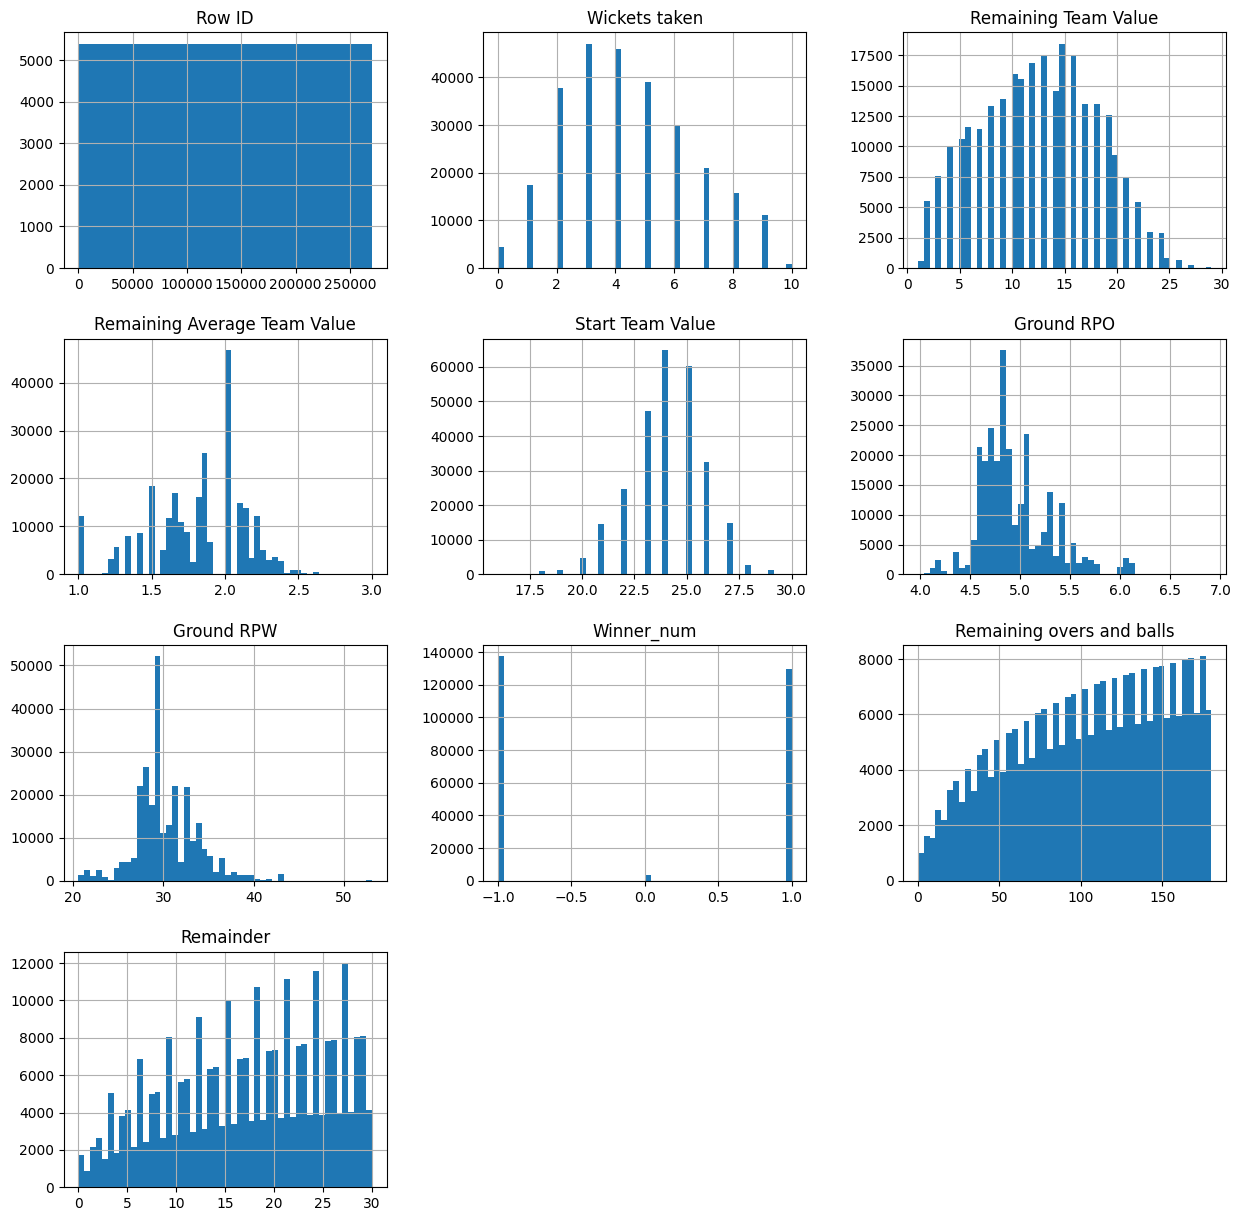

In [ ]:
data_df.hist(bins=50, figsize=(15, 15))
plt.show()

Comments: Different scales, normal distribution of team value, slightly skewed of ground rpo and rpw.  Remainder funny - should I do it in balls rather than remainder?  Might make more sense.

Wickets taken and team value seem to follow Gaussian distribution and have low standard deviation (2.19 and 2.53 respectively)
Turned remaining overs and balls into remainder number and std much lower for that(7.87 compared to 47.24)

The other attributes have low standard deviation too but ground rpo, ground rpw and 

In [ ]:
data_df['Winner_num'].value_counts()

Winner_num
-1    137321
 1    129422
 0      3480
Name: count, dtype: int64

In [ ]:
data_df.shape

(270223, 10)

Not using random sampling because it may end up with oversampling/ undersampling due to the imbalance of data.

In [ ]:
from zlib import crc32
import numpy as np

def is_id_in_set(identifier, set_ratio, hash_function):
    return hash_function(np.int64(identifier)) < set_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, validation_ratio, id_column, random_state=None):
    np.random.seed(random_state)  # Set seed for reproducibility

    # Use different hash functions for test and validation sets to ensure independence
    hash_for_test = lambda x: crc32(x) & 0xffffffff
    hash_for_validation = lambda x: crc32(x + 1) & 0xffffffff

    ids = data[id_column]

    in_test_set = ids.apply(lambda id_: is_id_in_set(id_, test_ratio, hash_for_test))
    in_validation_set = ids.apply(lambda id_: is_id_in_set(id_, validation_ratio, hash_for_validation))

    # Combine the conditions to get the training set
    in_train_set = ~in_test_set & ~in_validation_set

    return data.loc[in_train_set], data.loc[in_validation_set], data.loc[in_test_set]

train_set, validation_set, test_set = split_data_with_id_hash(data_df, test_ratio=0.1, validation_ratio=0.2, id_column='Row ID', random_state=7)


In [ ]:
test_set

,Row ID,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
23,23,3,16,2.000000,24,4.79,29.31,-1,156,26.0
25,25,3,16,2.000000,24,4.79,29.31,-1,154,25.4
30,30,3,16,2.000000,24,4.79,29.31,-1,149,24.5
35,35,4,13,1.857143,24,4.79,29.31,-1,144,24.0
36,36,4,13,1.857143,24,4.79,29.31,-1,143,23.5
...,...,...,...,...,...,...,...,...,...,...
270149,270149,2,16,1.777778,21,5.40,31.64,1,87,14.3
270156,270156,2,16,1.777778,21,5.40,31.64,1,80,13.2
270193,270193,2,16,1.777778,21,5.40,31.64,1,43,7.1
270198,270198,2,16,1.777778,21,5.40,31.64,1,38,6.2


In [ ]:
train_set.shape

(192638, 10)

In [ ]:
test_set.shape

(27022, 10)

In [ ]:
validation_set.shape

(54045, 10)

In [ ]:
data_train = train_set.copy()
data_train.drop('Row ID', axis=1, inplace=True)
data_train = data_train.reset_index(drop=True)
data_train.to_csv("data_train_csv")

In [ ]:
data_test = test_set.copy()
data_test.drop('Row ID', axis=1, inplace=True)
data_test = data_test.reset_index(drop=True)
data_test.to_csv("data_test_csv")

In [ ]:
data_val = validation_set.copy()
data_val.drop('Row ID', axis=1, inplace=True)
data_val = data_val.reset_index(drop=True)
data_val.to_csv("data_val_csv")

In [ ]:
data_test

,Wickets taken,Remaining Team Value,Remaining Average Team Value,Start Team Value,Ground RPO,Ground RPW,Winner_num,Remaining overs and balls,Remainder
0,3,16,2.000000,24,4.79,29.31,-1,156,26.0
1,3,16,2.000000,24,4.79,29.31,-1,154,25.4
2,3,16,2.000000,24,4.79,29.31,-1,149,24.5
3,4,13,1.857143,24,4.79,29.31,-1,144,24.0
4,4,13,1.857143,24,4.79,29.31,-1,143,23.5
...,...,...,...,...,...,...,...,...,...
27017,2,16,1.777778,21,5.40,31.64,1,87,14.3
27018,2,16,1.777778,21,5.40,31.64,1,80,13.2
27019,2,16,1.777778,21,5.40,31.64,1,43,7.1
27020,2,16,1.777778,21,5.40,31.64,1,38,6.2


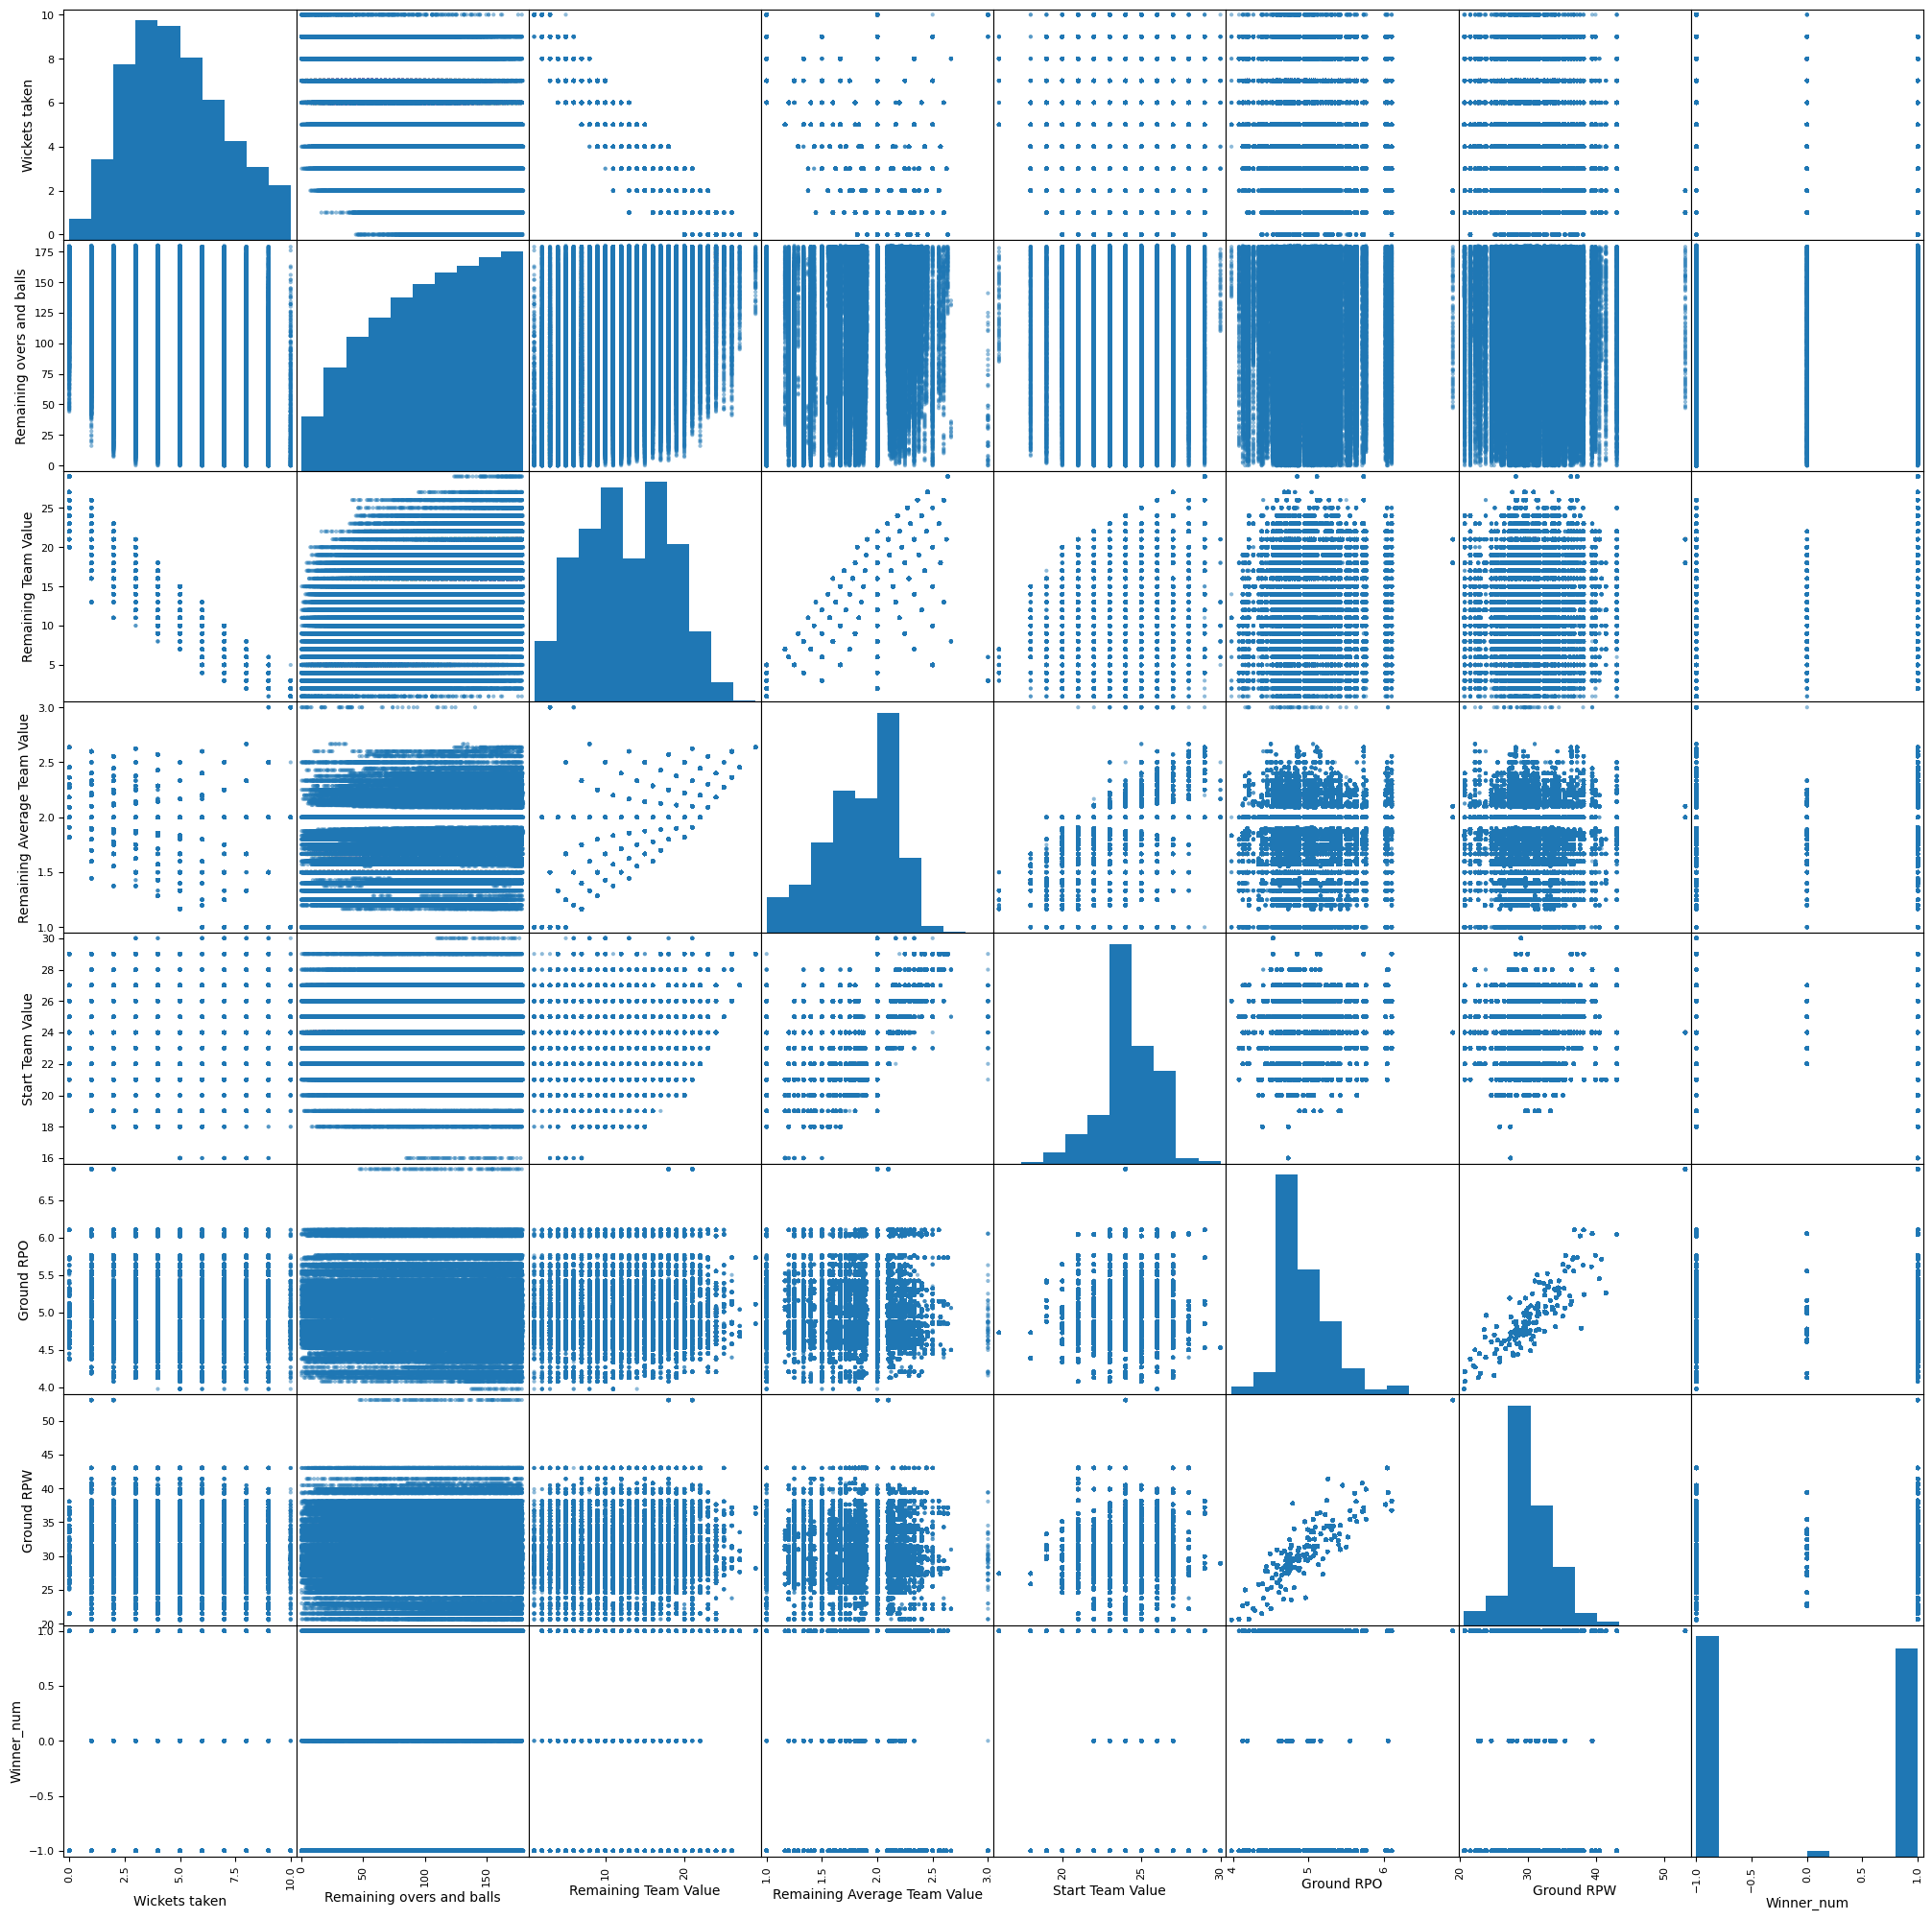

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["Wickets taken", "Remaining overs and balls", "Remaining Team Value", "Remaining Average Team Value", "Start Team Value", "Ground RPO", "Ground RPW", "Winner_num"]
scatter_matrix(data_train[attributes], figsize=(25, 25))
plt.show()

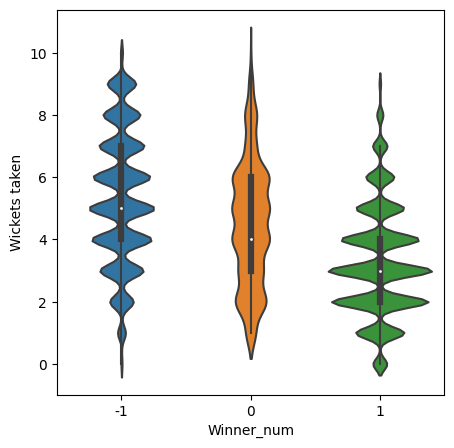

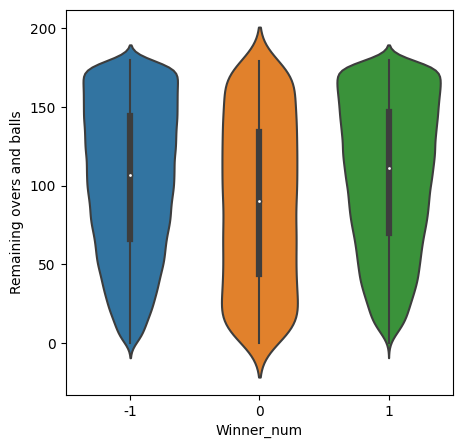

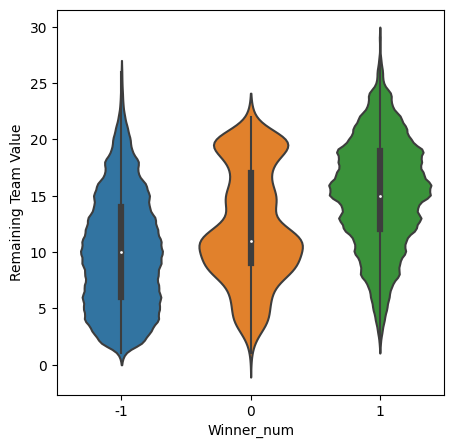

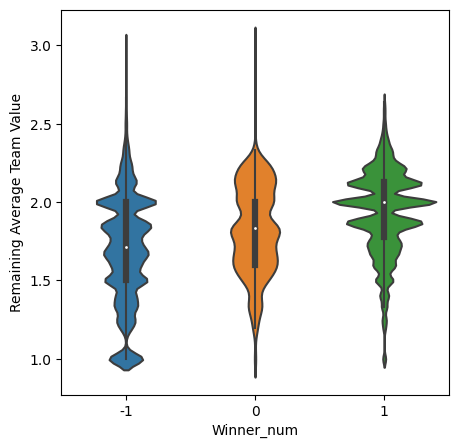

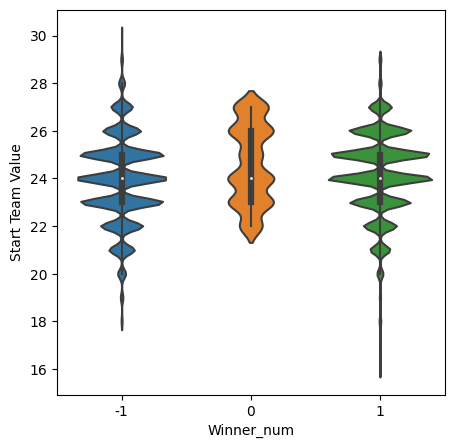

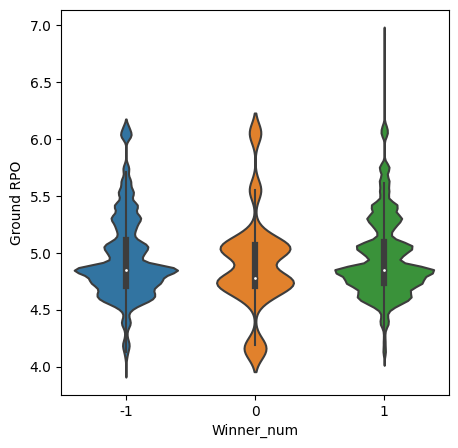

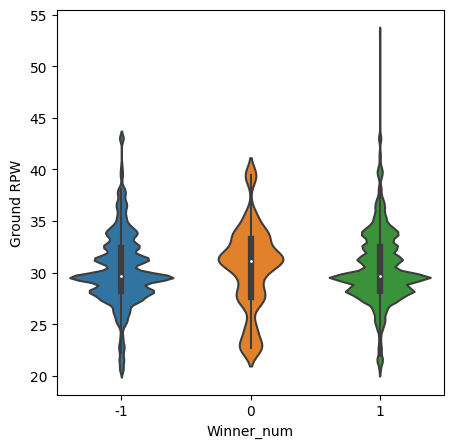

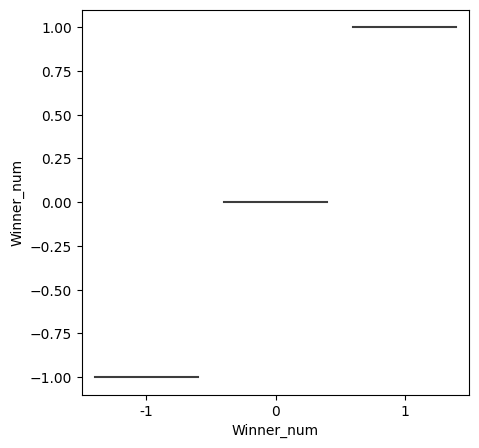

In [ ]:
for a in attributes:
    plt.figure(figsize = (5, 5))
    sns.violinplot(x='Winner_num',y=a,data=data_train)

From the boxplots you can see some near separation between wickets taken and whether team 1 or team 2 win, but a mixture for tie.

For Team Value you also see some separation between team 1 and team 2, though more overlap than for the boxplots.  Again, tie for mixture.

Aside from some outliers, Ground RPO, Ground RPW and remaining overs and balls don't seem to predict whether team 1 or team 2 wins.

In [ ]:
corr_matrix = data_train.corr(method = 'pearson')

In [ ]:
corr_matrix
corr_matrix['Winner_num']

Wickets taken                  -0.468518
Remaining Team Value            0.470484
Remaining Average Team Value    0.374691
Start Team Value                0.081998
Ground RPO                      0.010083
Ground RPW                      0.024348
Winner_num                      1.000000
Remaining overs and balls       0.031652
Remainder                       0.031645
Name: Winner_num, dtype: float64

<Axes: >

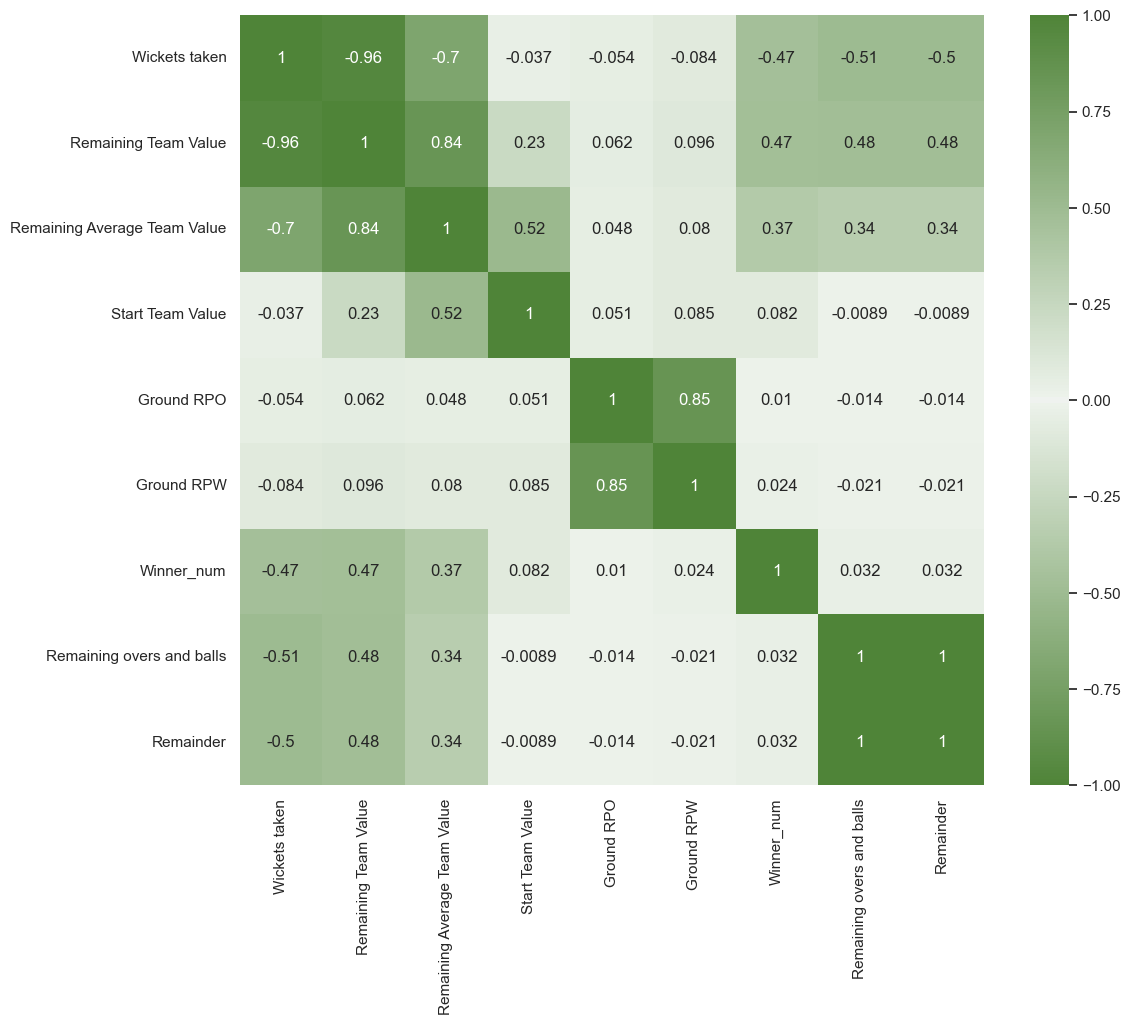

In [ ]:
sns.set(rc={'figure.figsize':(12,10)})
new_cmap = sns.diverging_palette(120, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, cmap=new_cmap, vmin=-1, vmax=1)

In [ ]:
skew = data_train.skew(axis='rows')
print(skew)

Wickets taken                   0.333318
Remaining Team Value            0.028484
Remaining Average Team Value   -0.522478
Start Team Value               -0.286228
Ground RPO                      0.956388
Ground RPW                      0.558363
Winner_num                      0.057715
Remaining overs and balls      -0.269706
Remainder                      -0.270432
dtype: float64


#Commentary on correlation

Best correlation with winner are wickets taken and team value.  Unsurprisingly there's strong correlation between ground RPO and RPW.  Strong correlation betwen team value and wickets taken, which also makes sense as the more wickets taken the lower the team value.  Should I really be looking at the higher team value to start with rather than continuing team value?  Probably a better predictor but also again is that unfair?  Will run the code again and check.

Pearson or 

Data Commentary in general

Number of rows, balance of the category, skew, separability for the boxplots.

Upsampling/ oversampling to sort out imbalance

https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/


In [ ]:
X_train = data_train.drop('Winner_num', axis=1)
X_val = data_val.drop('Winner_num', axis=1)
X_test = data_test.drop('Winner_num', axis=1)

y_train = pd.DataFrame(data_train['Winner_num'], columns=['Winner_num'])
y_val = pd.DataFrame(data_val['Winner_num'],columns=['Winner_num'])
y_test = pd.DataFrame(data_test['Winner_num'], columns=['Winner_num'])

HERE'S WHERE TO START EDIT FROM


In [ ]:
#x+2 if there are some 0 and -1 values
#x+1 if not
def logtransform(trainx, trainy):
    xlogtransform = trainx[['Wickets taken', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder']].apply(lambda x: np.log(x+1))
    xlogtransform.reset_index(drop=True)
    xlogtransform.insert(loc=2, column='Remaining Team Value', value=trainx['Remaining Team Value'])
        
    ylogtransform = trainy[['Winner_num']].apply(lambda x: np.log(x+2))
    
    return (xlogtransform, ylogtransform)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

def mm(trainx, testx, valx):
    
    #MinMaxScaler - Normalisation is rescaling the data so that all values are within the range of 0 and 1
    X_scaler = MinMaxScaler(feature_range=(0,1))
    X_scaler.fit(trainx)
    trainx_norm = X_scaler.transform(trainx)
    testx_norm = X_scaler.transform(testx)
    valx_norm = X_scaler.transform(valx)

    ##reshape 1d arrays to 2d
    #trainy = trainy.to_numpy()
    #testy = testy.to_numpy()
    #valy = valy.to_numpy()
    #trainy = trainy.reshape(len(trainy), 1)
    #testy= testy.reshape(len(testy), 1)
    #valy = valy.reshape(len(valy), 1)


    #y_scaler = MinMaxScaler(feature_range=(0,1))

    #y_scaler.fit(trainy)
    #trainy_norm = y_scaler.transform(trainy)
    #testy_norm = y_scaler.transform(testy)
    #valy_norm = y_scaler.transform(valy)

    trainx_norm = pd.DataFrame(trainx_norm, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder'])
    testx_norm = pd.DataFrame(testx_norm, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder'])
    valx_norm = pd.DataFrame(valx_norm, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder'])

    #trainy_norm = pd.DataFrame(trainy_norm, columns=['Winner_num'])
    #testy_norm = pd.DataFrame(testy_norm, columns=['Winner_num'])
    #valy_norm = pd.DataFrame(valy_norm, columns=['Winner_num'])
    
    return(trainx_norm, testx_norm, valx_norm)

Data Standardisation

In [ ]:
#stan not working

from sklearn.preprocessing import StandardScaler
def ss(trainx, testx, valx):
    scaler = StandardScaler()
    scaler.fit(trainx)
    trainx = scaler.transform(trainx)
    testx = scaler.transform(testx)
    valx = scaler.transform(valx)

    trainx = pd.DataFrame(trainx, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder'])
    testx = pd.DataFrame(testx, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder'])
    valx = pd.DataFrame(valx, columns=['Wickets taken', 'Remaining Team Value', 'Remaining Average Team Value', 'Start Team Value', 'Ground RPO', 'Ground RPW', 'Remaining overs and balls', 'Remainder'])

    return (trainx, testx, valx)

In [ ]:
#https://arxiv.org/abs/1106.1813

from imblearn.over_sampling import SMOTE

def imbalance(trainx, trainy, strategy):
    if strategy == 'auto':
        smote = SMOTE(sampling_strategy='auto', random_state=7)

    elif strategy == 'minority':
        smote = SMOTE(sampling_strategy='minority', random_state=7)
    trainx_smote, trainy_smote = smote.fit_resample(X_train, y_train)
    
    return(trainx_smote, trainy_smote)

In [ ]:
def process(trainx, testx, valx, trainy, testy, valy):

    data_train_df = trainx.copy()
    data_train_df['Winner_num']= trainy['Winner_num']

    data_test_df = testx.copy()
    data_test_df['Winner_num']= testy['Winner_num']
    
    data_val_df = valx.copy()
    data_val_df['Winner_num']= valy['Winner_num']

    return (data_train_df, data_test_df, data_val_df)    

In [ ]:
sdfsdfs

NameError: name 'sdfsdfs' is not defined

In [ ]:
y_val.shape

(54045, 1)

In [ ]:
#SMOTE min only
X_train, y_train = imbalance(X_train, y_train, 'minority')
data_smin_train_df, data_test_df, data_val_df = process(X_train, X_test, X_val, y_train, y_test, y_val)

In [ ]:
#SMOTE and MinMax
X_mm_train, X_mm_test, X_mm_val = mm(X_train, X_test, X_val)
data_smin_mm_train_df, data_mm_test_df, data_mm_val_df = process(X_mm_train, X_mm_test, X_mm_val, y_train, y_test, y_val)

In [ ]:
#SMOTE and SS
X_ss_train, X_ss_test, X_ss_val = ss(X_train, X_test, X_val)
data_smin_ss_train_df, data_ss_test_df, data_ss_val_df = process(X_ss_train, X_ss_test, X_ss_val, y_train, y_test, y_val)

In [ ]:
##Smote only
data_smin_train_df.to_csv('data_smin_train_csv')
data_test_df.to_csv('data_test_csv')
data_val_df.to_csv('data_val_csv')

In [ ]:
##Smote and minmax
data_smin_mm_train_df.to_csv('data_smin_mm_train_csv')
data_mm_test_df.to_csv('data_mm_test_csv')
data_mm_val_df.to_csv('data_mm_val_csv')

In [ ]:
##Smote and ss
data_smin_ss_train_df.to_csv('data_smin_ss_train_csv')
data_ss_test_df.to_csv('data_ss_test_csv')
data_ss_val_df.to_csv('data_ss_val_csv')

https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/#:~:text=In%20a%20dataset%20with%20highly,obviously%20not%20the%20correct%20one.

Models

Random Forest
SVM
Neural Network

Questions:
Should I change the 0s to 3s or similar for Winner_num so that I don't have to add things to them to do the lognorm etc.